In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seed fro reproducibility
np.random.seed(42)

In [2]:
#create synythetic data
students = 40
study_hours = np.random.randint(1, 10, students)
job_hours = np.random.randint(0, 15, students)
sleep_hours = np.random.randint(4, 9, students)
extracurricullar = np.random.randint(0, 6, students)


# Exam score: positively influenced by study & sleep, negatively by job & extra activities

exam_score = (40
              +5*study_hours
              +2*sleep_hours
              -3*job_hours
              -1*extracurricullar
              +np.random.randint(-5, 5, students)
              )


data = pd.DataFrame({
    "study_hours":study_hours,
    "job_hours":job_hours,
    "sleep_hours":sleep_hours,
    "extracurricular_hours":extracurricullar,
    "exam_score":exam_score
})

In [3]:
data.head()

,study_hours,job_hours,sleep_hours,extracurricular_hours,exam_score
0,7,9,7,2,58
1,4,4,4,0,60
2,8,1,8,2,92
3,5,3,8,4,71
4,7,11,5,5,48


In [4]:
corr_correficient = data.corr()
corr_correficient

,study_hours,job_hours,sleep_hours,extracurricular_hours,exam_score
study_hours,1.000000,0.076427,0.155248,-0.118338,0.615404
job_hours,0.076427,1.000000,0.252023,-0.083942,-0.697643
sleep_hours,0.155248,0.252023,1.000000,-0.105864,0.093354
extracurricular_hours,-0.118338,-0.083942,-0.105864,1.000000,-0.086014
exam_score,0.615404,-0.697643,0.093354,-0.086014,1.000000


In [5]:
data.columns

Index(['study_hours', 'job_hours', 'sleep_hours', 'extracurricular_hours',
       'exam_score'],
      dtype='object')

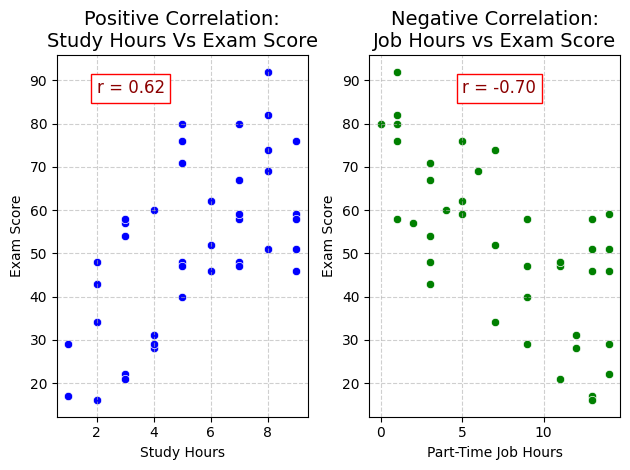

In [10]:
# Lets plot the realationship on a scatter plot
#Plot: Positive correlation: study vs score

plt.subplot(1, 2, 1)
sns.scatterplot(x="study_hours", y="exam_score", data=data,color="blue")
plt.title("Positive Correlation:\nStudy Hours Vs Exam Score",fontsize=14)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.text(2, max(data["exam_score"])-5,f"r = {data.corr().loc["study_hours","exam_score"]:.2f}",
         fontsize=12, color="darkred",bbox=dict(facecolor="white", edgecolor="red"))
plt.grid(True, linestyle="--", alpha=0.6)

# Negative correlation: Job vs Score
plt.subplot(1,2,2)
sns.scatterplot(x="job_hours",y="exam_score",data=data,color="green")
plt.title("Negative Correlation:\nJob Hours vs Exam Score", fontsize=14)
plt.xlabel("Part-Time Job Hours")
plt.ylabel("Exam Score")
plt.text(5, max(data["exam_score"])-5, f"r = {data.corr().loc["job_hours","exam_score"]:.2f}",
         fontsize=12, color="darkred", bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

